In [0]:
#Importando a biblioteca pandas para carregar e visualizar a base de dados
import pandas as pd

In [0]:
passageiros = pd.read_csv('Passageiros.csv')

In [5]:
passageiros.head()

,tempo,nPassageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [0]:
#Com as bibliotecas seaborn e matplotlib vamos conseguir gerar gráficos para visualizar a base de dados. 
import seaborn as sns
import matplotlib.pyplot as plt

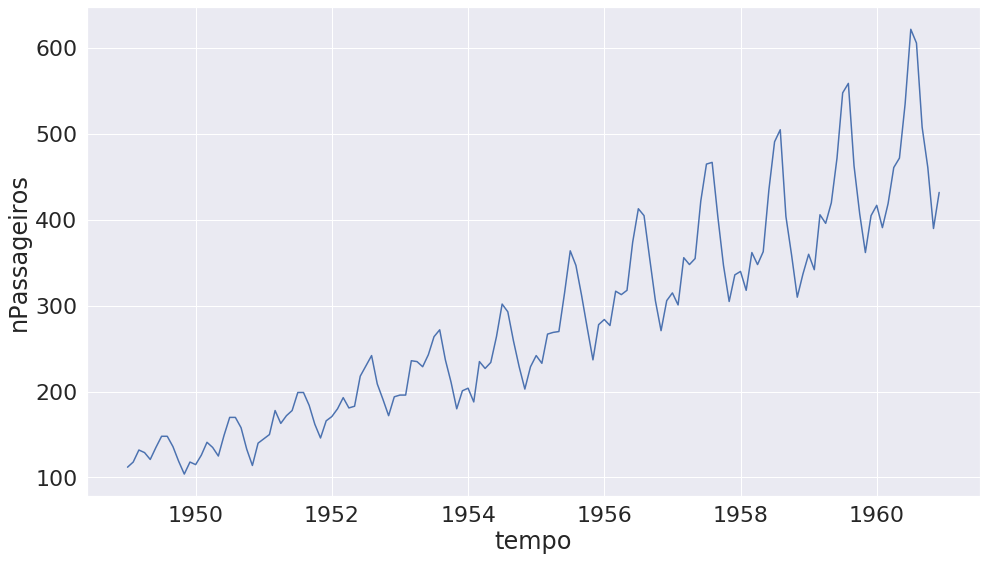

In [7]:
plt.figure(figsize = (16,9))
sns.set(font_scale=2)
sns.lineplot(x="tempo", y="nPassageiros", data=passageiros)

In [0]:
#Seleciona todas as colunas menos a última
Tempo = passageiros.iloc[:,:-1].values

In [0]:
nPassageiros = passageiros.iloc[:,1].values

In [0]:
#Podemos separar parte dos dados para treino e teste
from sklearn.model_selection import train_test_split

In [0]:
Tempo_treino, Tempo_teste, nPassageiros_treino, nPassageiros_teste = train_test_split(Tempo, nPassageiros, 
                                                                                      test_size = 0.3)

In [0]:
from sklearn import linear_model

In [0]:
regressor = linear_model.LinearRegression()

In [14]:
#Ajustando a reta aos dados de treino
regressor.fit(Tempo_treino,nPassageiros_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
nPassageiros_predito = regressor.predict(Tempo_teste)

In [0]:
import numpy as np

In [0]:
#Colocando os dados em um data frame para posteriormente gerar uma figura com o 
# Seaborn
passageiros_predito = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste),
                                    'nPassageiros': nPassageiros_predito,
             })
passageiros_teste = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste),
                                    'nPassageiros': nPassageiros_teste,
             })


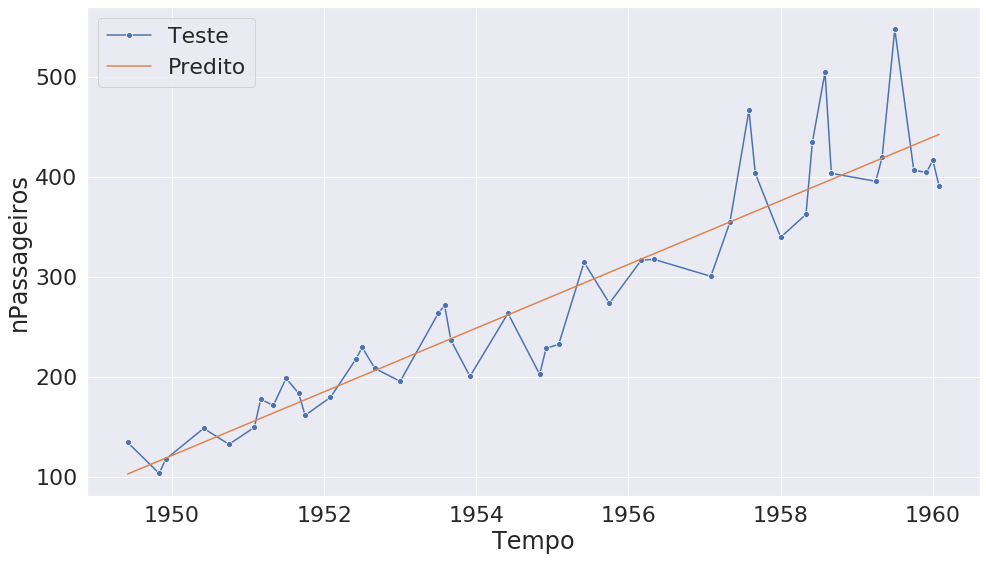

In [18]:
plt.figure(figsize = (16,9))
sns.set(font_scale=2)
sns.lineplot(x="Tempo", y="nPassageiros", data = passageiros_teste,  marker='o', label = "Teste")
sns.lineplot(x='Tempo', y='nPassageiros', data = passageiros_predito, label = "Predito" )

## Medindo a qualidade da regressão

In [30]:
#Extraindo o coeficiente angular da reta ajustada
regressor.coef_

array([31.84199339])

In [31]:
#Extraindo o coeficiente linear da reta ajustada
regressor.intercept_

-61970.02764698745

In [0]:
from sklearn.metrics import r2_score

In [33]:
# r2_score para a reta ajustada
r2_score(nPassageiros_teste,nPassageiros_predito)

0.8719305351749145

## SVM

In [0]:
from sklearn.svm import SVR

In [32]:
# Ajusta o modelo de regressão com a máquina de vetor de suporte
regressor_svr = SVR( C=1000000)
regressor_svr.fit(Tempo_treino,nPassageiros_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1000000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
nPassageiros_predito_svr = regressor_svr.predict(Tempo_teste)

In [0]:
passageiros_predito_svr = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste),
                                    'nPassageiros': nPassageiros_predito_svr,
             })

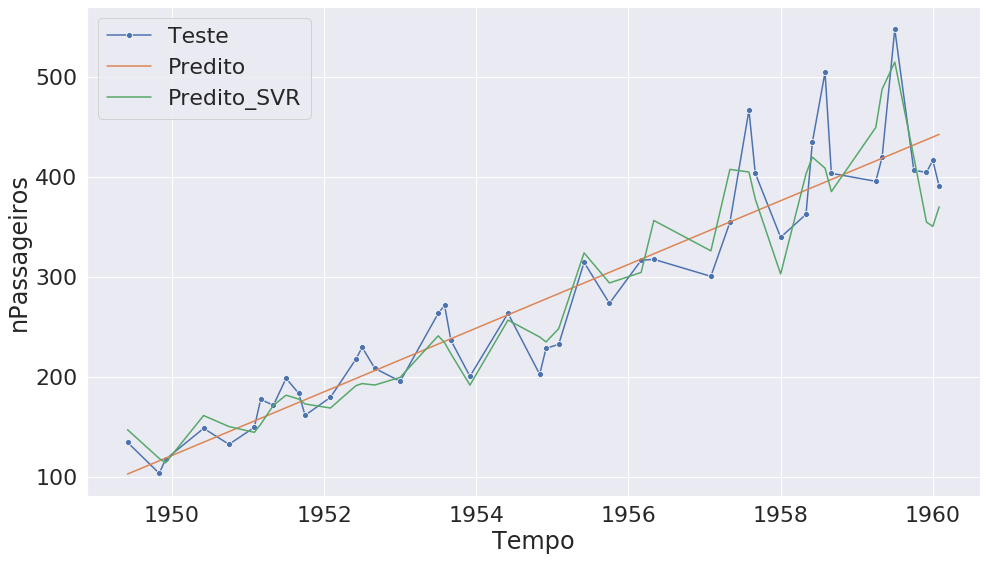

In [28]:
plt.figure(figsize = (16,9))
sns.set(font_scale=2)
sns.lineplot(x="Tempo", y="nPassageiros", data = passageiros_teste,  marker='o', label = "Teste")
sns.lineplot(x='Tempo', y='nPassageiros', data = passageiros_predito, label = "Predito" )
sns.lineplot(x='Tempo', y='nPassageiros', data = passageiros_predito_svr, label = "Predito_SVR" )

In [34]:
# r2_score para a curva ajustada
r2_score(nPassageiros_teste,nPassageiros_predito_svr)

0.9161897932908017